In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats
from collections import Counter

plt.style.use("seaborn")

u, s = "µ", "σ"

In [66]:
def test_normal(x):
    k2, p = stats.normaltest(x)
    alpha = 1e-3
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("It's not a normal distribution")
    else:
        print("It's a normal distribution")
        
    plt.hist(x)
    plt.show()

# Aufgabe 1

In [67]:
df = pd.read_csv("data/Hans Rosling Data Extract_Full Data_decSepPoint.csv")
df.head(3)

,Country,Country Group,Year,Child Mortality (5 yrs),Child Survival%,Children per Women,GDP per Capita,Life Expectancy,Population,Unnamed: 9
0,Afghanistan,South Asia,1962,352.0,64.8,7.45,NaN,40.1,9350000,NaN
1,Albania,E. Europe &\n\nCentral Asia,1962,173.0,82.7,6.28,NaN,64.6,1740000,NaN
2,Algeria,Arab States,1962,245.0,75.5,7.61,1630.0,53.2,11700000,NaN


In [68]:
df_arab = df[(df["Country Group"] == "Arab States") & (df["Year"] == 1962)]
print(df_arab.shape)
df_arab.head(1)

(21, 10)


,Country,Country Group,Year,Child Mortality (5 yrs),Child Survival%,Children per Women,GDP per Capita,Life Expectancy,Population,Unnamed: 9
2,Algeria,Arab States,1962,245.0,75.5,7.61,1630.0,53.2,11700000,NaN


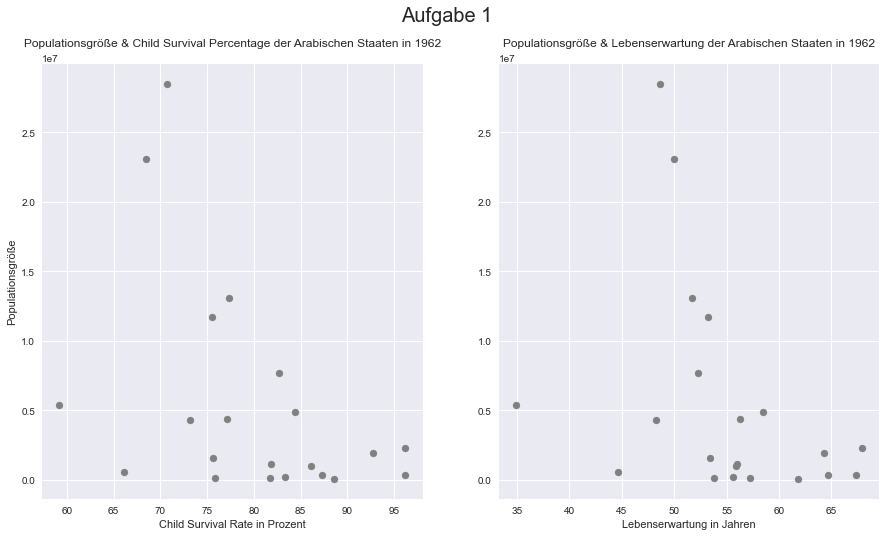


CAPTION: Aufgabe 1, Werte für die arabische Staatengruppe in 1962
µ(Populationsgröße): 5357500.0,
σ(Populationsgröße): 7792630.156372109,
µ(Lebenserwartung): 55.06190476190477,
σ(Lebenserwartung): 7.790473425310955,
µ(Child-Survival-Rate): 80.0%
σ(Child-Survival-Rate): 9.638672107712765,



In [69]:
x_data_1 = df_arab["Child Survival% "]
x_data_2 = df_arab["Life Expectancy"]
y_data_1 = df_arab["Population"]
y_data_2 = df_arab["Population"]

suptitle = "Aufgabe 1"
title_1 = "Populationsgröße & Child Survival Percentage der Arabischen Staaten in 1962\n"
title_2 = "Populationsgröße & Lebenserwartung der Arabischen Staaten in 1962\n"
x_label_1 = "Child Survival Rate in Prozent"
x_label_2 = "Lebenserwartung in Jahren"
y_label_1 = "Populationsgröße"
y_label_2 = y_label_1

caption = f"""
CAPTION: Aufgabe 1, Werte für die arabische Staatengruppe in 1962
{u}(Populationsgröße): {df_arab['Population'].mean()},
{s}(Populationsgröße): {df_arab['Population'].std()},
{u}(Lebenserwartung): {df_arab['Life Expectancy'].mean()},
{s}(Lebenserwartung): {df_arab['Life Expectancy'].std()},
{u}(Child-Survival-Rate): {df_arab['Child Survival% '].mean()}%
{s}(Child-Survival-Rate): {df_arab['Child Survival% '].std()},
"""

plt.figure(figsize=(15, 8))
plt.suptitle(suptitle, size=20)

plt.subplot(121)
plt.title(title_1)
plt.xlabel(x_label_1)
plt.ylabel(y_label_1)
# plt.xticks(
#     rotation=90
# )
plt.scatter(x=x_data_1, y=y_data_1, color="gray", label="LABEL") #s=size


plt.subplot(122)
plt.title(title_2)
plt.xlabel(x_label_2)
# plt.ylabel(y_label_2)
# plt.xticks(
#     rotation=90
# )
plt.scatter(x=x_data_2, y=y_data_2, color="gray", label="LABEL") #s=size


plt.show()
print(caption)

# Aufgabe 2

In [70]:
df = pd.read_csv("data/Hans Rosling Data Extract_Full Data_decSepPoint.csv")
df.head(3)

,Country,Country Group,Year,Child Mortality (5 yrs),Child Survival%,Children per Women,GDP per Capita,Life Expectancy,Population,Unnamed: 9
0,Afghanistan,South Asia,1962,352.0,64.8,7.45,NaN,40.1,9350000,NaN
1,Albania,E. Europe &\n\nCentral Asia,1962,173.0,82.7,6.28,NaN,64.6,1740000,NaN
2,Algeria,Arab States,1962,245.0,75.5,7.61,1630.0,53.2,11700000,NaN


In [71]:
df["Country Group"].unique()

array(['South Asia', 'E. Europe &\n\nCentral Asia', 'Arab States',
       'Sub-Saharan\n\nAfrica', 'Latin America', 'OECD',
       'East Asia\n\n& Pacific'], dtype=object)

In [72]:
df_sa = df[df["Country Group"] == "South Asia"]
df_ss = df[df["Country Group"] == "Sub-Saharan\n\nAfrica"]
df_sa.shape, df_ss.shape

((456, 10), (2736, 10))

In [76]:
df_sa_life = df_sa.groupby("Year").mean()
df_ss_life = df_ss.groupby("Year").mean()

df_sa_pop = df_sa.groupby("Year").sum()
df_ss_pop = df_ss.groupby("Year").sum()

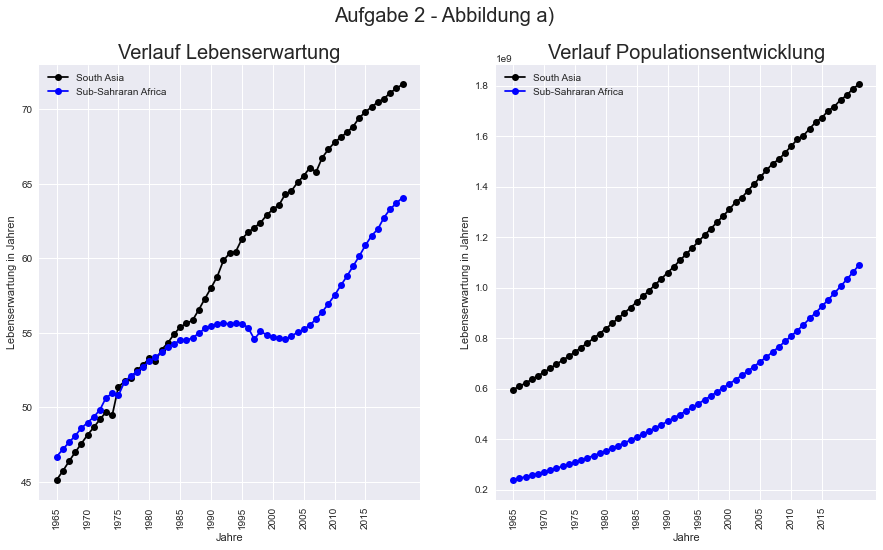


CAPTION: 
A: Anfang der 60er/70er war die Lebenserwartung noch fast gleich, bei SubSahrara ist es ab den 90ern aber stark eingebrochen. 
   Daher auch aktuell ungefähr 10 Jahre weniger als in Asien



In [120]:
plot_df = None
x_data = range(len(df_sa_life["Life Expectancy"])) # can be a range object
y_data = df_sa_life["Life Expectancy"]
colors = ["red", "black" ] #, "purple", "green"] 

title = "Verlauf Lebenserwartung"
x_label = "Jahre"
y_label = "Lebenserwartung in Jahren"

caption = f"""
CAPTION: 
A: Anfang der 60er/70er war die Lebenserwartung noch fast gleich, bei SubSahrara ist es ab den 90ern aber stark eingebrochen. 
   Daher auch aktuell ungefähr 10 Jahre weniger als in Asien
"""

plt.figure(figsize=(15, 8))
plt.suptitle("Aufgabe 2 - Abbildung a)", size=20)

plt.subplot(121)
plt.title(title, size=20)
plt.plot(x_data, y_data, c="black", marker="o", label="South Asia")
plt.plot(range(len(df_ss_life["Life Expectancy"])), df_ss_life["Life Expectancy"], c="blue", marker="o", label="Sub-Sahraran Africa")
# for group, color in list(zip(y_data, colors)):
#     plt.plot(x_data, y_data, c=color, label=group, marker="o") # TODO
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.xticks(
    range(0, len(df["Year"].unique()) -2, 5),
    [year for year in df["Year"].unique()[:-1] if year % 5 == 0],
    rotation=90
)
plt.legend()

plt.subplot(122)
plt.title("Verlauf Populationsentwicklung", size=20)
plt.plot(range(len(df_sa_pop["Population"])), df_sa_pop["Population"], c="black", marker="o", label="South Asia")
plt.plot(range(len(df_ss_pop["Population"])), df_ss_pop["Population"], c="blue", marker="o", label="Sub-Sahraran Africa")
# for group, color in list(zip(y_data, colors)):
#     plt.plot(x_data, y_data, c=color, label=group, marker="o") # TODO
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xticks(
    range(0, len(df["Year"].unique()) -2, 5),
    [year for year in df["Year"].unique()[:-1] if year % 5 == 0],
    rotation=90
)
plt.legend()


plt.show()
print(caption)

In [98]:
df_sa[df_sa["Year"] == 1962].head()

,Country,Country Group,Year,Child Mortality (5 yrs),Child Survival%,Children per Women,GDP per Capita,Life Expectancy,Population,Unnamed: 9
0,Afghanistan,South Asia,1962,352.0,64.8,7.45,NaN,40.1,9350000,NaN
12,Bangladesh,South Asia,1962,250.0,75.0,6.79,391.0,44.9,51000000,NaN
18,Bhutan,South Asia,1962,333.0,66.7,6.67,NaN,42.9,235000,NaN
73,India,South Asia,1962,238.0,76.2,5.89,312.0,43.0,468000000,NaN
100,Maldives,South Asia,1962,336.0,66.4,7.12,NaN,33.4,94900,NaN


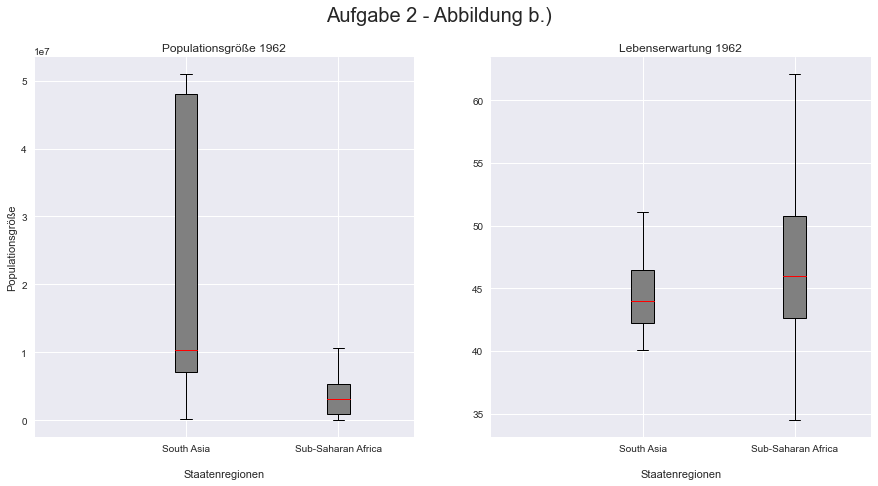


CAPTION: Aufgabe 2 - Teil b)
B: Wobei South Asia eine viel größere Population hat, hat SubSahara eine deutlich höhere Lebenserwartung.
Zugleich hat SubSahara aber auch deutlich erhöhte Streuungsmaße.



In [121]:
names = ["", "South Asia", "Sub-Saharan Africa"]

title = "Aufgabe 2 - Abbildung b.)"
x_label = "\nStaatenregionen"
y_label = "Populationsgröße"

caption = f"""
CAPTION: Aufgabe 2 - Teil b)
B: Wobei South Asia eine viel größere Population hat, hat SubSahara eine deutlich höhere Lebenserwartung.
Zugleich hat SubSahara aber auch deutlich erhöhte Streuungsmaße.
"""


plt.figure(figsize=(15, 7))
plt.suptitle(title, size=20)

plt.subplot(121)
plt.title("Populationsgröße 1962")
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.boxplot([df_sa[df_sa["Year"] == 1962]["Population"], df_ss[df_ss["Year"] == 1962]["Population"]], patch_artist=True, boxprops=dict(facecolor="gray"), medianprops=dict(color="red"), showfliers=False)
plt.xticks(range(len(names)), names)


plt.subplot(122)
plt.title("Lebenserwartung 1962")
plt.xlabel(x_label)
plt.boxplot([df_sa[df_sa["Year"] == 1962]["Life Expectancy"], df_ss[df_ss["Year"] == 1962]["Life Expectancy"]], patch_artist=True, boxprops=dict(facecolor="gray"), medianprops=dict(color="red"), showfliers=False)
plt.xticks(range(len(names)), names)


plt.show()
print(caption)

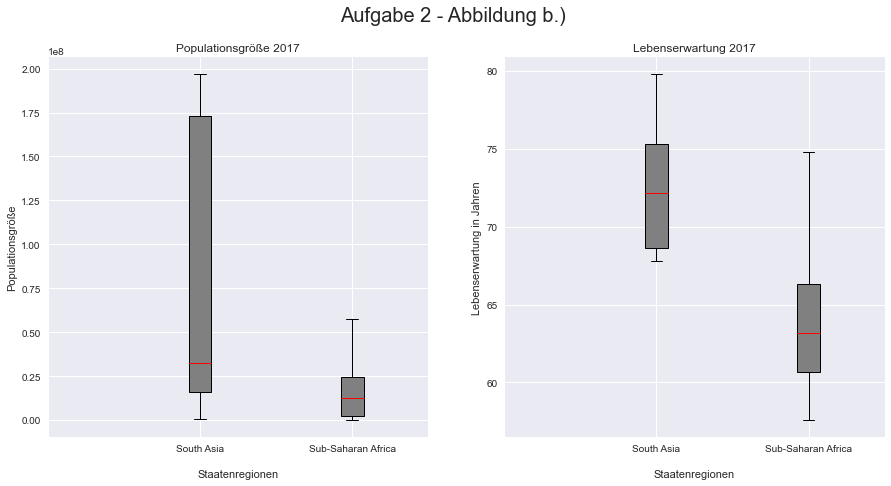


CAPTION: Aufgabe 2 - Teil b)
C: Hauptunterschied ist in der Lebenserwartung. Im Vergleich zu 1962 erkennt man eine Trendwende. Nun haben die Menschen in Asien eine
deutlich höhere Lebenserwartung, wobei die Populationsgröße im Verhältnis der Staatengruppen immer noch ähnlich ist.



In [122]:
names = ["", "South Asia", "Sub-Saharan Africa"]

title = "Aufgabe 2 - Abbildung b.)"
x_label = "\nStaatenregionen"
y_label = "Populationsgröße"

caption = f"""
CAPTION: Aufgabe 2 - Teil b)
C: Hauptunterschied ist in der Lebenserwartung. Im Vergleich zu 1962 erkennt man eine Trendwende. Nun haben die Menschen in Asien eine
deutlich höhere Lebenserwartung, wobei die Populationsgröße im Verhältnis der Staatengruppen immer noch ähnlich ist.
"""


plt.figure(figsize=(15, 7))
plt.suptitle(title, size=20)

plt.subplot(121)
plt.title("Populationsgröße 2017")
plt.xlabel(x_label)
plt.ylabel(y_label)

plt.boxplot([df_sa[df_sa["Year"] == 2017]["Population"], df_ss[df_ss["Year"] == 2017]["Population"]], patch_artist=True, boxprops=dict(facecolor="gray"), medianprops=dict(color="red"), showfliers=False)
plt.xticks(range(len(names)), names)


plt.subplot(122)
plt.title("Lebenserwartung 2017")
plt.xlabel(x_label)
plt.ylabel("Lebenserwartung in Jahren")
plt.boxplot([df_sa[df_sa["Year"] == 2017]["Life Expectancy"], df_ss[df_ss["Year"] == 2017]["Life Expectancy"]], patch_artist=True, boxprops=dict(facecolor="gray"), medianprops=dict(color="red"), showfliers=False)
plt.xticks(range(len(names)), names)


plt.show()
print(caption)

# Aufgabe 3

In [123]:
df = pd.read_csv("data/Hans Rosling Data Extract_Full Data_decSepPoint.csv")
df.head(3)

,Country,Country Group,Year,Child Mortality (5 yrs),Child Survival%,Children per Women,GDP per Capita,Life Expectancy,Population,Unnamed: 9
0,Afghanistan,South Asia,1962,352.0,64.8,7.45,NaN,40.1,9350000,NaN
1,Albania,E. Europe &\n\nCentral Asia,1962,173.0,82.7,6.28,NaN,64.6,1740000,NaN
2,Algeria,Arab States,1962,245.0,75.5,7.61,1630.0,53.2,11700000,NaN


In [130]:
df_years = df[(df["Year"] == 1962) | (df["Year"] == 2017)]

res = {}
res_inv = {}
for country in df_years["Country"].unique():
    diff = df_years[df_years["Country"] == country].iloc[1]["Life Expectancy"] - df_years[df_years["Country"] == country].iloc[0]["Life Expectancy"]
    res[country] = diff
    res_inv[str(diff)] = country

In [131]:
max(res_inv.keys())

'9.700000000000003'

In [138]:
m = 0
for v in res.values():
    if int(v) > m:
        m = v

46.4

In [140]:
res_inv[str(m)]

'Maldives'

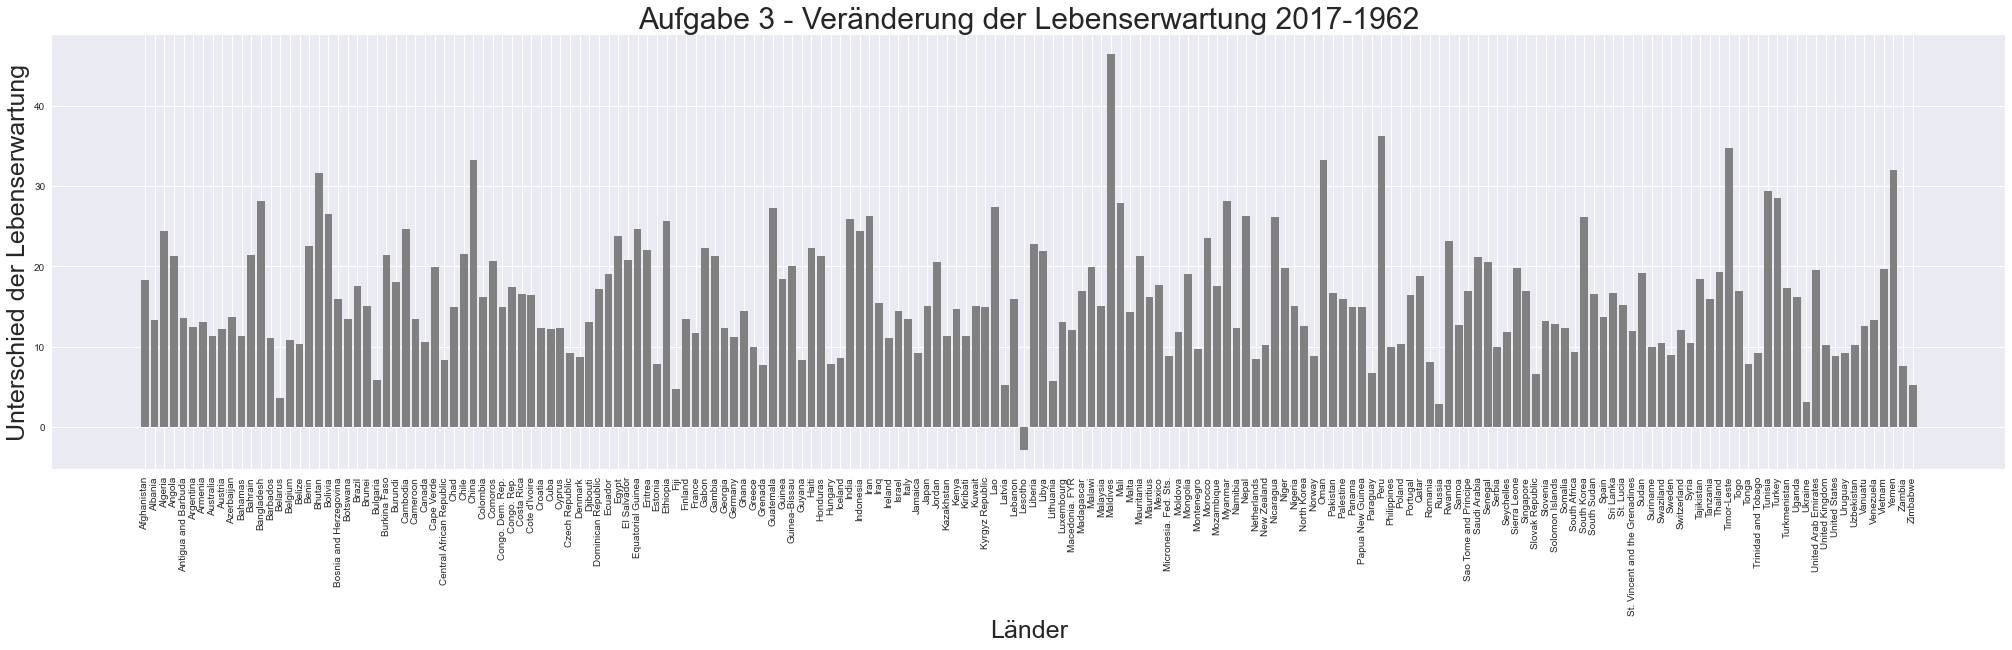


CAPTION: 
Die Maledieven haben mit 46.4 Jahren Unterschied den maximalen Wert



In [154]:
x_data = range(len(res.values()))
y_data = list(res.values())

title = "Aufgabe 3 - Veränderung der Lebenserwartung 2017-1962"
x_label = "Länder"
y_label = "Unterschied der Lebenserwartung"

caption = f"""
CAPTION: 
Die Maledieven haben mit 46.4 Jahren Unterschied den maximalen Wert
"""

plt.figure(figsize=(35, 8))

plt.title(title, size=30)
plt.xlabel(x_label, size=25)
plt.ylabel(y_label, size=25)
plt.xticks(
    x_data,
    list(res.keys()),
    rotation=90
)

plt.bar(x=x_data, height=y_data, color="gray")
# for i, v in enumerate(y_data.to_list()):
#     plt.text(
#         list(range(len(x_data)))[i], 
#         v + 300, str(v), 
#         horizontalalignment="center", 
#         verticalalignment="bottom", 
#         color="black"
#     )

plt.show()
print(caption)